In [1]:
import os
import pandas as pd
import seaborn as sns
import similarity_index as similarity_index
from scipy import stats
import statsmodels as sms

### Complexity Analysis

In [2]:
DATA_DIR = r"outputs_new"
FS_METHODS = ["backwardSFS", "oneDSAE", "bayesianDSAE", "ensembleDSAE"]

In [3]:
sfs_results_df = pd.read_csv(os.path.join(DATA_DIR, "backwardSFS/results_df.csv"), index_col=0)
sAE_results_df = pd.read_csv(os.path.join(DATA_DIR, "oneDSAE", "results_df.csv"))
bAE_results_df = pd.read_csv(os.path.join(DATA_DIR, "bayesianDSAE", "results_df.csv"))
eAE_results_df = pd.read_csv(os.path.join(DATA_DIR, "ensembleDSAE", "results_df.csv"))

In [4]:
stat_df = {"fs_method":[], "# runs":[], "exe_time":[], "memory":[]}

In [5]:
sAE_stat_df = pd.DataFrame({"# runs":sAE_results_df.groupby(["outer_seed"]).first().index.to_numpy(), "exe_time":sAE_results_df.groupby(["outer_seed"]).first()["exe_time"].to_numpy(), "memory":sAE_results_df.groupby(["outer_seed"]).first()["memory"]})
stat_df["fs_method"] += ['singleAE'] * len(sAE_stat_df)
stat_df["# runs"] += list(sAE_stat_df["# runs"].to_numpy() + 1)
stat_df["exe_time"] += list(sAE_stat_df["exe_time"].to_numpy())
stat_df["memory"] += list(sAE_stat_df["memory"].to_numpy())

bAE_stat_df = pd.DataFrame({"# runs":bAE_results_df.groupby(["outer_seed"]).first().index.to_numpy(), "exe_time":bAE_results_df.groupby(["outer_seed"]).first()["exe_time"].to_numpy(), "memory":bAE_results_df.groupby(["outer_seed"]).first()["memory"]})
stat_df["fs_method"] += ['bayesianAE'] * len(bAE_stat_df)
stat_df["# runs"] += list(bAE_stat_df["# runs"].to_numpy() + 1)
stat_df["exe_time"] += list(bAE_stat_df["exe_time"].to_numpy())
stat_df["memory"] += list(bAE_stat_df["memory"].to_numpy())

eAE_stat_df = pd.DataFrame({"# runs":eAE_results_df.groupby(["outer_seed", "b"]).first().groupby("outer_seed").sum().index.to_numpy(), "exe_time":eAE_results_df.groupby(["outer_seed", "b"]).first().groupby("outer_seed").sum()["exe_time"].to_numpy(), "memory":eAE_results_df.groupby(["outer_seed", "b"]).first().groupby("outer_seed").sum()["memory"].to_numpy()})
stat_df["fs_method"] += ['ensembleAE'] * len(eAE_stat_df)
stat_df["# runs"] += list(eAE_stat_df["# runs"].to_numpy()+1)
stat_df["exe_time"] += list(eAE_stat_df["exe_time"].to_numpy())
stat_df["memory"] += list(eAE_stat_df["memory"].to_numpy())

In [6]:
def acronym(estimator):

    acronym = ""
    
    if estimator=="LogisticRegression":
        acronym = "SFS+LR"
    elif estimator=="SVC":
        acronym = "SFS+L-SVM"
    elif estimator=="RandomForestClassifier":
        acronym = "SFS+RF"
    elif estimator=="MLPClassifier":
        acronym = "SFS+MLP"
    else:
        print("Invalid estimator name")

    return acronym

In [7]:
for estimator in ["LogisticRegression", "SVC", "RandomForestClassifier", "MLPClassifier"]:

    _df = sfs_results_df.groupby(["estimator","outer_seed"]).sum().loc[estimator]
    sfs_stat_df = pd.DataFrame({"# runs":_df.index.to_numpy()+1, "exe_time":_df["exe_time"].to_numpy(), "memory":_df["memory"].to_numpy()})

    stat_df["fs_method"] += [acronym(estimator)] * len(sfs_stat_df)
    stat_df["# runs"] += list(sfs_stat_df["# runs"].to_numpy()+1)
    stat_df["exe_time"] += list(sfs_stat_df["exe_time"].to_numpy())
    stat_df["memory"] += list(sfs_stat_df["memory"].to_numpy())


    

In [8]:
for key in stat_df:

    print(key, len(stat_df[key]))

fs_method 700
# runs 700
exe_time 700
memory 700


In [9]:
stat_df = pd.DataFrame(stat_df)
stat_df["cumulative_exe_time"] = stat_df.groupby('fs_method')['exe_time'].cumsum()
stat_df["cumulative_memory"] = stat_df.groupby('fs_method')['memory'].cumsum()

display(stat_df)

,fs_method,# runs,exe_time,memory,cumulative_exe_time,cumulative_memory
0,singleAE,1,13.068965,169.232368,13.068965,169.232368
1,singleAE,2,6.073690,158.315548,19.142654,327.547916
2,singleAE,3,5.196361,158.284442,24.339016,485.832358
3,singleAE,4,5.252577,158.292294,29.591593,644.124652
4,singleAE,5,6.030737,158.293301,35.622330,802.417953
...,...,...,...,...,...,...
695,SFS+MLP,97,4403.171702,1.037496,455915.555497,99.155366
696,SFS+MLP,98,4606.075846,1.025168,460521.631343,100.180534
697,SFS+MLP,99,4066.695837,1.040569,464588.327179,101.221104
698,SFS+MLP,100,4455.538432,1.032318,469043.865611,102.253422


In [10]:
stat_df['exe_time (mins)'] = stat_df['exe_time']/60
stat_df['cumulative_exe_time (hrs)'] = stat_df['cumulative_exe_time']/(60*60)

stat_df["memory (GiB)"] = stat_df["memory"]/1024
stat_df["cumulative_memory (GiB)"] = stat_df["cumulative_memory"]/1024

In [29]:
stat_df.groupby(by="fs_method").mean()

,# runs,exe_time,memory,cumulative_exe_time,cumulative_memory,exe_time (mins),cumulative_exe_time (hrs),memory (GiB),cumulative_memory (GiB)
fs_method,,,,,,,,,
SFS+L-SVM,51.5,178.669528,0.520827,9009.587827,26.294154,2.977825,2.502663,0.000509,0.025678
SFS+LR,51.5,240.471710,1.794161,11957.711562,90.685215,4.007862,3.321587,0.001752,0.088560
SFS+MLP,51.5,4737.921219,1.032787,232496.994599,52.192966,78.965354,64.582498,0.001009,0.050970
SFS+RF,51.5,7430.025426,1.294258,375935.983876,65.576765,123.833757,104.426662,0.001264,0.064040
bayesianAE,50.5,6.835154,158.426553,349.871098,8005.286240,0.113919,0.097186,0.154713,7.817662
ensembleAE,50.5,526.969910,15817.808587,26745.661576,798804.613261,8.782832,7.429350,15.447079,780.082630
singleAE,50.5,5.351349,158.399090,276.640004,8004.571327,0.089189,0.076844,0.154687,7.816964


<Axes: xlabel='exe_time (mins)', ylabel='fs_method'>

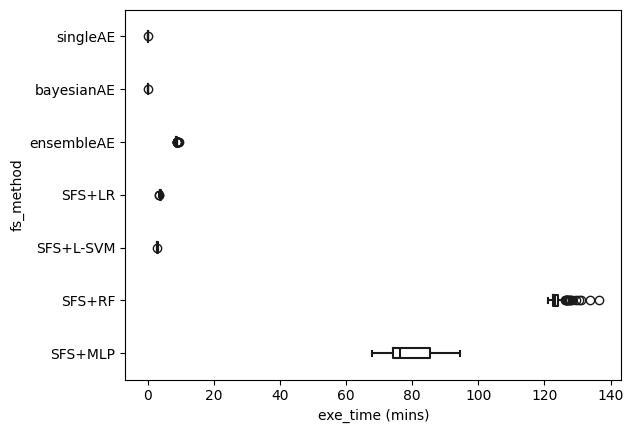

In [11]:
sns.boxplot(data=stat_df, x='exe_time (mins)', y='fs_method', width=.2, fill=False, color=".1")

<Axes: xlabel='memory (GiB)', ylabel='fs_method'>

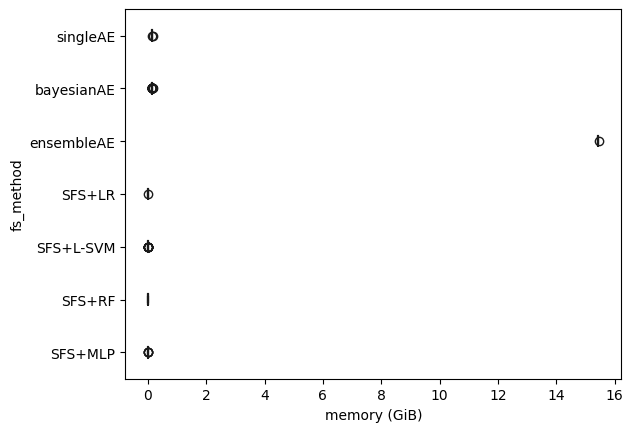

In [80]:
sns.boxplot(data=stat_df, x='memory (GiB)', y='fs_method', width=.2, fill=False, color=".1")

<Axes: xlabel='cumulative_exe_time (hrs)', ylabel='fs_method'>

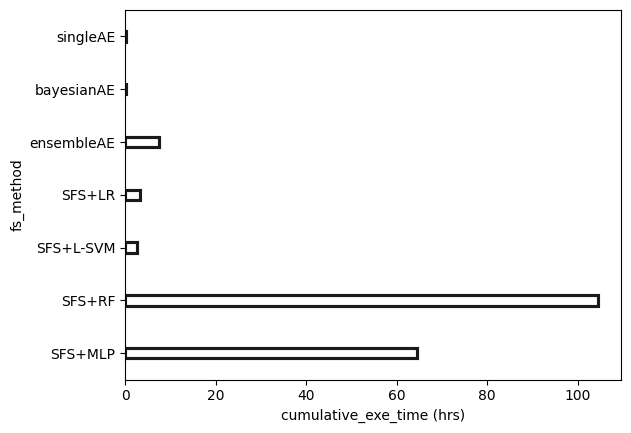

In [31]:
# sns.barplot(data=time_df, x='cumulative_exe_time', y='fs_method', width=.2, fill=False, color=".4")
# sns.boxplot(data=time_df, x='exe_time', y='fs_method', width=.2, fill=False, color=".4")
sns.barplot(data=stat_df, x='cumulative_exe_time (hrs)', y='fs_method', width=.2, fill=False, color=".1", errorbar=None)

<Axes: xlabel='cumulative_memory (GiB)', ylabel='fs_method'>

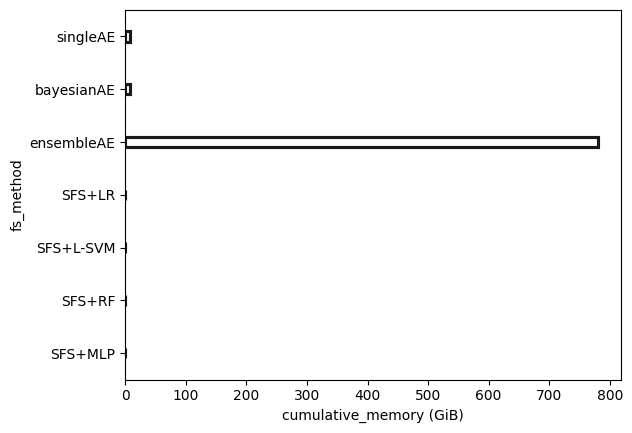

In [81]:
sns.barplot(data=stat_df, x='cumulative_memory (GiB)', y='fs_method', width=.2, fill=False, color=".1", errorbar=None)

In [101]:
(stat_df[stat_df.fs_method=="SFS+LR"]["exe_time"].sum())/(60*60)

6.679769729508294

In [102]:
(stat_df[stat_df.fs_method=="SFS+L-SVM"]["exe_time"].sum())/(60*60)

4.963042455977864

In [103]:
(stat_df[stat_df.fs_method=="SFS+MLP"]["exe_time"].sum())/(60*60)

131.60892275936072

In [104]:
(stat_df[stat_df.fs_method=="SFS+RF"]["exe_time"].sum())/(60*60)

206.3895951769087

In [105]:
(stat_df[stat_df.fs_method=="ensembleAE"]["exe_time"].sum())/(60*60)

14.638053066001998